In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Load dataset
df_solarirrdiance = pd.read_csv("SolarPrediction.csv")


In [ ]:
# Select relevant features
features = df_solarirrdiance[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']]
target = df_solarirrdiance[['Radiation']]

In [ ]:
# Scale features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target)

In [ ]:
# Create sequences for LSTM
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, TIME_STEPS)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=32))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0181 - mae: 0.0979 - val_loss: 0.0110 - val_mae: 0.0696
Epoch 2/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0111 - mae: 0.0703 - val_loss: 0.0097 - val_mae: 0.0631
Epoch 3/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0099 - mae: 0.0623 - val_loss: 0.0094 - val_mae: 0.0657
Epoch 4/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0089 - mae: 0.0589 - val_loss: 0.0081 - val_mae: 0.0523
Epoch 5/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0082 - mae: 0.0546 - val_loss: 0.0082 - val_mae: 0.0550
Epoch 6/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0080 - mae: 0.0544 - val_loss: 0.0077 - val_mae: 0.0514
Epoch 7/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0077 - mae: 0.0521 - val_loss: 0.0076 - val_mae: 0.0474
Epoch 8/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0076 - mae: 0.0504 - val_loss: 0.0072 - val_mae: 0.0469
Epoch 9/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 6s 

In [ ]:
# Evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

loss, mae = model.evaluate(X_test, y_test)
r2 = r2_score(y_true, y_pred)

print("Test MAE (scaled):", mae)
print("Test MAE (original units):", scaler_y.inverse_transform([[mae]])[0][0])
print(f"✅ R-squared Score (R²): {r2:.4f}")

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0067 - mae: 0.0457
Test MAE (scaled): 0.04516705125570297
Test MAE (original units): 73.38405706681313
✅ R-squared Score (R²): 0.8334


In [ ]:
# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


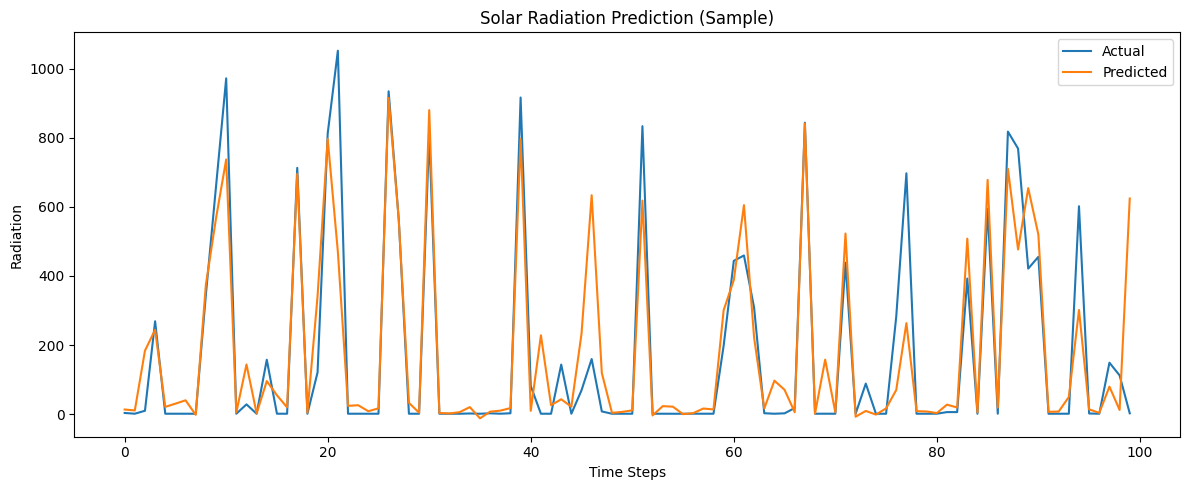

In [ ]:
# Plot predictions vs actual
plt.figure(figsize=(12, 5))
plt.plot(y_true[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Solar Radiation Prediction (Sample)')
plt.xlabel('Time Steps')
plt.ylabel('Radiation')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Build LSTM model with 128 units
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=64))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - loss: 0.0174 - mae: 0.0955 - val_loss: 0.0107 - val_mae: 0.0685
Epoch 2/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 0.0104 - mae: 0.0658 - val_loss: 0.0094 - val_mae: 0.0657
Epoch 3/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - loss: 0.0091 - mae: 0.0597 - val_loss: 0.0085 - val_mae: 0.0525
Epoch 4/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 0.0084 - mae: 0.0558 - val_loss: 0.0082 - val_mae: 0.0564
Epoch 5/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 0.0080 - mae: 0.0533 - val_loss: 0.0076 - val_mae: 0.0505
Epoch 6/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - loss: 0.0076 - mae: 0.0517 - val_loss: 0.0078 - val_mae: 0.0496
Epoch 7/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 0.0075 - mae: 0.0508 - val_loss: 0.0073 - val_mae: 0.0512
Epoch 8/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 0.0074 - mae: 0.0505 - val_loss: 0.0072 - val_mae: 0.0483
Epoch 9/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
loss, mae = model.evaluate(X_test, y_test)
r2 = r2_score(y_true, y_pred)
print("Test MAE (scaled):", mae)
print("Test MAE (original units):", scaler_y.inverse_transform([[mae]])[0][0])
print(f"✅ R-squared Score (R²): {r2:.4f}")


205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0064 - mae: 0.0441
Test MAE (scaled): 0.043470609933137894
Test MAE (original units): 70.66949648451062
✅ R-squared Score (R²): 0.8334


In [ ]:
print("Test MAE (original units):", scaler_y.inverse_transform([[mae]])[0][0])

Test MAE (original units): 70.66949648451062


In [ ]:
# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [ ]:
import plotly.graph_objects as go

# Plot predictions vs actual
fig = go.Figure()
fig.add_trace(go.Scatter(y=y_true_rescaled.flatten(), mode='lines', name='Actual'))
fig.add_trace(go.Scatter(y=y_pred_rescaled.flatten(), mode='lines', name='Predicted'))

fig.update_layout(
    title='Solar Radiation Prediction',
    xaxis_title='Time Steps',
    yaxis_title='Radiation',
    legend_orientation="h",
    legend_yanchor="bottom",
    legend_y=1.02,
    legend_xanchor="right",
    legend_x=1
)

fig.show()

In [ ]:
# Build LSTM model with 128 units
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 38s 85ms/step - loss: 0.0166 - mae: 0.0931 - val_loss: 0.0107 - val_mae: 0.0708
Epoch 2/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - loss: 0.0109 - mae: 0.0677 - val_loss: 0.0097 - val_mae: 0.0573
Epoch 3/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 36s 88ms/step - loss: 0.0096 - mae: 0.0608 - val_loss: 0.0087 - val_mae: 0.0564
Epoch 4/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - loss: 0.0086 - mae: 0.0561 - val_loss: 0.0082 - val_mae: 0.0552
Epoch 5/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - loss: 0.0082 - mae: 0.0536 - val_loss: 0.0073 - val_mae: 0.0488
Epoch 6/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - loss: 0.0075 - mae: 0.0506 - val_loss: 0.0071 - val_mae: 0.0473
Epoch 7/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 34s 83ms/step - loss: 0.0076 - mae: 0.0512 - val_loss: 0.0083 - val_mae: 0.0514
Epoch 8/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - loss: 0.0074 - mae: 0.0506 - val_loss: 0.0077 - val_mae: 0.0498
Epoch 9/20
409/409 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
loss, mae = model.evaluate(X_test, y_test)
r2 = r2_score(y_true, y_pred)
print("Test MAE (scaled):", mae)
print("Test MAE (original units):", scaler_y.inverse_transform([[mae]])[0][0])
print(f"✅ R-squared Score (R²): {r2:.4f}")

205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0064 - mae: 0.0411
Test MAE (scaled): 0.04011194780468941
Test MAE (original units): 65.29513327967376
✅ R-squared Score (R²): 0.8417


In [ ]:
# Inverse transform from scaled to original units
y_true_rescaled = scaler_y.inverse_transform(y_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)

# Calculate metrics in original units
mse = mean_squared_error(y_true_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_true_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_true_rescaled, y_pred_rescaled)

# Display results
print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ R-squared (R²): {r2:.4f}")

✅ Mean Squared Error (MSE): 15557.4265
✅ Mean Absolute Error (MAE): 69.5595
✅ Root Mean Squared Error (RMSE): 124.7294
✅ R-squared (R²): 0.8417
